# Autour de la matrice du Laplacien

En analyse numérique, une matrice essentielle qui apparaît souvent est la matrice dite du Laplacien. C'est la matrice obtenue en discrétisant par la méthode des différences finies l'opérateur Laplacien en dimension 1 d'espace. 

Dans ce cours, nous étudierons quelques outils d'analyse matricielle numérique et nous les appliquerons le plus souvent à cette matrice qui possède de nombreuses propriétés agréables.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Le problème de Laplace

Considérons le problème de Laplace canonique suivant : nous cherchons une fonction $u:[0,1]\to\mathbb{R}$ qui vérifie le problème
\begin{equation}
\left\lbrace
\begin{aligned}
&-\Delta u(x) = f(x),&&0<x<1,\\
&u(0)=u(1)=0,
\end{aligned}
\right.
\end{equation}
où $f:[0,1]\to\mathbb{R}$ est une fonction régulière (par exemple continue).

Ce problème peut se résoudre directement. La solution est donnée par la formule
\begin{equation}
u(x) = x \int_0^1 \int_0^t f(s) \, \operatorname{d}\!s \, \operatorname{d}\!t - \int_0^x \int_0^t f(s) \, \operatorname{d}\!s \, \operatorname{d}\!t .
\end{equation}

La méthode des différences finies consiste à construire un maillage de l'intervalle $[0,1]$, c'est-à-dire une famille de points $x_i = \frac{i}{N+1}$, $0\leq i\leq N+1$, pour $N\in\mathbb{N}$. Le pas d'espace $h$ est défini comme la distance entre les points du maillage : $h = \frac{1}{N+1}$.
Puis nous définissons $u_i$, $0\leq i\leq N+1$, comme l'approximation de $u(x_i)$ par la formule
\begin{equation}
-\frac{u_{i+1}-2u_i+u_{i-1}}{h^2} = f_i, \qquad 1\leq i\leq N,
\end{equation}
où $f_i = f(x_i)$, $1\leq i\leq N$.
Evidemment nous complétons ces relations à l'aide des conditions de bord : $u_0 = u_{N+1} = 0$.

Nous pouvons écrire l'ensemble de ces relations sous une forme matricielle. Nous définissons $U = (u_1,\ldots,u_N)^T \in\mathbb{R}^N$, $F = (f_1,\ldots,f_N)^T\in\mathbb{R}^N$ et $A$ la matrice de taille $N{\times}N$ par
$$ 
A = \frac{1}{h^2}\begin{pmatrix}
2&-1&0&\ldots&0\\
-1&2&-1&\ddots&\vdots\\
0&\ddots&\ddots&\ddots&0\\
\vdots&\ddots&-1&2&-1\\
0&\ldots&0&-1&2
\end{pmatrix}.
$$
Nous pouvons donc récrire le problème sous forme matricielle
$$ Au = F.$$

### Question 1

> Créez une fonction `mat_Laplacien_1D` qui prend en argument un entier $N$ et qui renvoie la matrice $A$ de taille $N$. Vérifiez votre fonction en affichant la matrice pour $N=9$.

> Afin de vérifier que le système $Au=F$ pourra bien être résolu, affichez l'approximation du déterminant obtenue par la fonction `det` de `np.linalg` pour s'assurer qu'il est loin de 0 et que la matrice est inversible. Que se passe-t-il lorsque $N$ augmente ?

In [29]:
h = 1/(N+1)

In [187]:
def mat_Laplacien_1D(N):
        
    A = 2*np.eye(N,N) + (-1)*np.eye(N,N,-1) + (-1)*np.eye(N,N,1)
    
    A *= (N+1)**2          
    
    return A

In [188]:
N = 9

#A = 2*np.eye(N,N) + (-1)*np.eye(N,N,-1) + (-1)*np.eye(N,N,1)

A = mat_Laplacien_1D(N)

print(np.size(A))

81


In [191]:
print(mat_Laplacien_1D(10))

[[ 242. -121.    0.    0.    0.    0.    0.    0.    0.    0.]
 [-121.  242. -121.    0.    0.    0.    0.    0.    0.    0.]
 [   0. -121.  242. -121.    0.    0.    0.    0.    0.    0.]
 [   0.    0. -121.  242. -121.    0.    0.    0.    0.    0.]
 [   0.    0.    0. -121.  242. -121.    0.    0.    0.    0.]
 [   0.    0.    0.    0. -121.  242. -121.    0.    0.    0.]
 [   0.    0.    0.    0.    0. -121.  242. -121.    0.    0.]
 [   0.    0.    0.    0.    0.    0. -121.  242. -121.    0.]
 [   0.    0.    0.    0.    0.    0.    0. -121.  242. -121.]
 [   0.    0.    0.    0.    0.    0.    0.    0. -121.  242.]]


In [192]:
D = np.linalg.det(A)
print (D)

9.999999999999961e+18


### Question 2

> Proposez une fonction `sol_Laplacien_1D` qui prend en argument un entier $N$ et une fonction $f$ et qui retourne deux vecteurs $x$ et $U$ correspondant aux points du maillage à $N+2$ points (incluant les points du bord $0$ et $1$) et la solution $U$ approchée obtenue par la résolution du système linéaire $AU=F$.

_Indication : pour résoudre le système linéaire, vous devrez utiliser la fonction `solve` du module `np.linalg`._

In [194]:
def sol_Laplacien_1D(N, f):
    x = np.linspace(0,1,N+2)
    A = mat_Laplacien_1D(N)
    F = np.zeros(N)
        
    F = f(x[1:-1])
        
    U = np.zeros(N+2)
    U[1:-1] = np.linalg.solve(A,F)
    
    #print(U)
    
    return x,U
    

In [195]:
x = np.linspace(0,1,N+2)
#print(x)
#print(np.size(x))

#print(A)
#N = 9
B = sol_Laplacien_1D(N,f)

### Question 3

> Prenons $f(x) = 1$. Dans ce cas, la solution est donnée par $u(x)=x(1-x)/2$.

> * Dans une fenêtre graphique, tracez la solution exacte en trait plein et la solution approchée pour $N\in\lbrace 4,10,17\rbrace$.
* Pouvons-nous nous satisfaire du résultat obtenu ?

Vous pourriez visualiser une image comme celle-ci.
<img src="img/TP01_01.png", width='75%'>

In [151]:
N1 = np.array([4,10,17])
print(N1)
print(np.size(N1))

[ 4 10 17]
3


In [152]:
def f(x):
    return 1+0*x;

def u(x):
    return x*(1-x)/2 ;

No handles with labels found to put in legend.


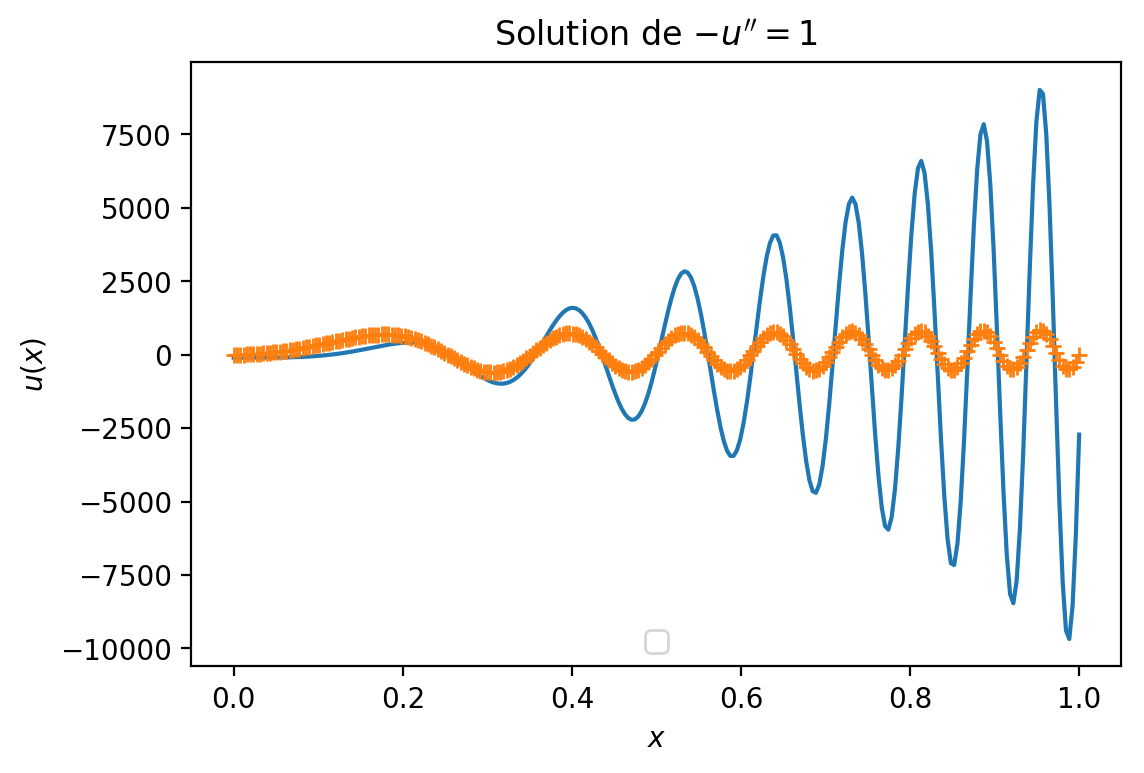

In [183]:
fig, ax = plt.subplots(figsize = (6, 4), dpi=100)
ax.set_title(r"Solution de $-u''=1$")

x,U = sol_Laplacien_1D(N,f)

plt.plot(x,f(x))
plt.plot(x,U,'+')
#plt.plot(x,u(x))

ax.legend(loc = 'lower center')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u(x)$');

Afin de tester plus avant notre solution numérique, nous proposons une méthode simple pour obtenir une solution plus complexe qu'un polynôme de degré 2. Choisissons une fonction _compliquée_ qui sera la solution exacte recherchée :
$$ u(x) = \sin(50x^2) - x\sin(50).$$
Nous dérivons à présent la fonction $u$ afin de déterminer le second membre :
\begin{align}
u(x) &= \sin(50x^2) - x\sin(50),\\
u'(x) &= 100x\cos(50x^2) - \sin(50),\\
u''(x) &= 100\cos(50x^2) - 10000x^2\sin(50x^2).
\end{align}

### Question 4

> * Calculez la solution numérique approchée obtenue avec le second membre 
$$f(x) = -100\cos(50x^2) + 10000x^2\sin(50x^2).$$
* Tracez ensuite la solution exacte et la solution approchée sur un même graphique.
* A partir de combien de points peut-on estimer que la solution est bien approchée ?

Vous pourriez visualiser une image comme celle-ci.
<img src="img/TP01_02.png", width='75%'>

In [205]:
def f(x):
    return -100 * np.cos(50*(x**2)) + 10000 * x**2 * np.sin(50 * x**2);
def u(x):
    return np.sin(50* x**2) - x*np.sin(50)

N = 256

No handles with labels found to put in legend.


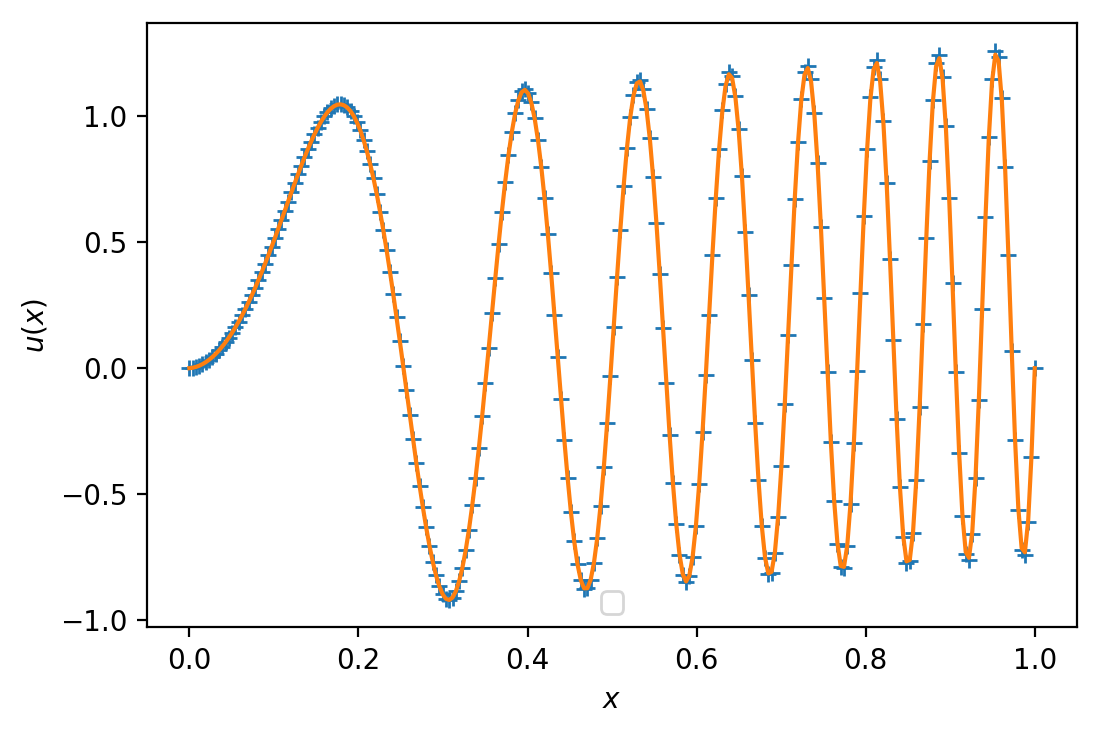

In [206]:
fig, ax = plt.subplots(figsize = (6, 4), dpi=100)
#ax.set_title(r"Solution de $-u''=1$")
    
x,U = sol_Laplacien_1D(N,f)

#plt.plot(x,f(x),)
plt.plot(x,U,'+')
plt.plot(x,u(x))

ax.legend(loc = 'lower center')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u(x)$');
#print(U)




## Convergence

Afin de comprendre le comportement de la suite de solutions approchées obtenues avec différents $N$, nous définissons l'erreur (en norme $\ell^\infty$)
$$ \varepsilon_N = \max_{0\leq i\leq N+1} |u_i - u(x_i)|,$$
où $(u_i)_{0\leq i\leq N+1}$ est la solution approchée et $(u(x_i))_{0\leq i\leq N+1}$ la solution exacte aux points d'approximation.

### Question 5

> * Calculez l'erreur $\varepsilon_N$ pour $N\in\lbrace 4,8,16,\ldots,1024\rbrace$ et tracez le nuage de points obtenu en échelle logarithmique (on pourra choisir $\log_2$ pour s'adapter aux choix des $N$). Ajoutez sur le graphique une droite de pente $-2$ (toujours en échelle logarithmique).
* Que constatez-vous ?

Vous pourriez visualiser une image comme celle-ci.
<img src="img/TP01_03.png", width='75%'>

In [213]:
N1 = np.arange(2,11,1)
N = 2**N1
print(N)

[   4    8   16   32   64  128  256  512 1024]


In [217]:
def eps(n,u):
    x,U = sol_Laplacien_1D(n,u)
    return np.max(u(x) - U)

In [221]:
En = np.zeros(9)
for i in range(0,9):
    En[i] = eps(N[i],u)
print(En)

[1.02551163 1.19809792 1.15723342 1.13987807 1.24395821 1.24116168
 1.23930026 1.24431803 1.24545405]


## Spectre de l'opérateur

Nous allons à présent essayer de comparer les opérateurs discret et continu afin de mieux comprendre le comportement de la solution approchée. Nous noterons
\begin{equation}
\begin{array}{rcl}
P : E = \bigl\lbrace f \in\mathcal{C}^2([0,1]) : f(0)=f(1)=0 \bigr\rbrace
&\longrightarrow &\mathcal{C}^0([0,1])\\
u &\mapsto& -\Delta u.
\end{array}
\end{equation}
_NB_ : nous avons inclu les conditions aux limites dans la définition de l'opérateur, ce qui est essentiel pour étudier ses propriétés.

Un outil intéressant pour comparer l'opérateur continu $P$ et l'opérateur discret associé $A$ est l'analyse du spectre.

L'opérateur $P$ étant un opérateur agissant sur un espace de fonctions de dimension infinie, il serait nécessaire a priori de faire appel à la théorie spectrale des opérateurs. Cependant, il est facile de vérifier qu'une base hilbertienne de $E$ est composée de vecteurs propres de $P$. Plus précisément :
$$ \forall k\in\mathbb{N}^\star \quad P \sin(k\pi\cdot) = k^2\pi^2 \sin(k\pi\cdot).$$
Ainsi, nous noterons $S_P$ le spectre de $P$ donné par
$$ S_P = \bigl\lbrace k^2\pi^2, k\in\mathbb{N}^\star\bigr\rbrace.$$

Nous remarquons par ailleurs que, pour $1\leq k\leq N$, le vecteur
$$ 
U = \Bigl( 
\sin\bigl(\tfrac{k\pi}{N+1}\bigr), 
\sin\bigl(\tfrac{2k\pi}{N+1}\bigr), 
\ldots, 
\sin\bigl(\tfrac{Nk\pi}{N+1}\bigr) 
\Bigr)^T
$$
est un vecteur propre de $A$. En effet, pour $1\leq i\leq N$, nous avons
$$
- \sin\bigl(\tfrac{k(i-1)\pi}{N+1}\bigr) 
+ 2 \sin\bigl(\tfrac{ki\pi}{N+1}\bigr)
- \sin\bigl(\tfrac{k(i+1)\pi}{N+1}\bigr) 
= 
2\Bigl(1 - \cos\bigl(\tfrac{k\pi}{N+1}\bigr)\Bigr) \sin\bigl(\tfrac{ki\pi}{N+1}\bigr)
=
4\sin^2\bigl(\tfrac{k\pi}{2(N+1)}\bigr)\sin\bigl(\tfrac{ki\pi}{N+1}\bigr).
$$

Nous noterons donc $\lambda_k$, $k\in\mathbb{N}$, les valeurs propres exactes et $\mu_k^N$, $1\leq k\leq N$, les valeurs propres discrètes (en rappelant dans la notation $\mu_k^N$ le paramètre $N$ de la discrétisation) :
$$
\lambda_k = k^2\pi^2,
\qquad
\mu_k^N = 4(N+1)^2\sin^2\bigl(\tfrac{k\pi}{2(N+1)}\bigr).
$$

### Question 6

> * Tracez dans une même fenêtre graphique les $N$ premières valeurs propres de l'opérateur continu $P$ ($\lambda_k$ pour $1\leq k\leq N$) et les $N$ valeurs propres de la matrice $A$  ($\mu_k^N$ pour $1\leq k\leq N$) obtenue avec $N+2$ points de discrétisation ($A$ est alors une matrice de taille $N{\times}N$).
* Vous pourrez prendre $N=32$ par exemple.

Vous pourriez visualiser une image comme celle-ci.
<img src="img/TP01_04.png", width='75%'>

In [ ]:
# A COMPLETER

Rappelons que 
$$ \forall x\in\mathbb{R},\qquad |\sin x|\leq |x|.$$
Ainsi, nous obtenons directement que 
$$\forall 1\leq k\leq N, \qquad 0<\mu_k^N\leq \lambda_k.$$

Si le second membre $f$ est une fonction propre de l'opérateur continu, c'est-à-dire qu'il existe $k\in\mathbb{N}^\star$ tel que $f = \sin(k\pi\cdot)$,
nous avons
$$ - \frac{1}{\lambda_k} \Delta \sin(k\pi x) = \sin(k\pi x).$$
Donc la solution exacte s'écrit
$$ u(x) = \frac{1}{\lambda_k} \sin(k\pi x).$$
De même la solution approchée avec $N+2$ points de discrétisation s'écrit
$$ 
U = \frac{1}{\mu_k^N} \Bigl(
\sin\bigl(\frac{k\pi}{N+1}\bigr),\ldots,\sin\bigl(\frac{kN\pi}{N+1}\bigr)
\Bigr)^T.
$$
La solution approchée a donc la bonne forme : elle est proportionnelle à la solution exacte mais le facteur de proportionnalité n'est pas 1 (ce serait l'idéal), il est plus grand que 1.

Nous pouvons résumer cela en disant que _les hautes fréquences_ (celles correspondant aux $k$ proches de $N$) _sont amplifiées_.

### Question 7

> * Afin de mesurer ce coefficient d'amplification selon la valeur de $N$, tracez dans une même fenêtre graphique le rapport $\lambda_k/\mu_k^N$ pour $k\leq N\leq 512$, avec $k\in\lbrace 4,8,\ldots,128\rbrace$ par exemple. 
* Que constatez-vous ?

Vous pourriez visualiser une image comme celle-ci.
<img src="img/TP01_05.png", width='75%'>

In [ ]:
# A COMPLETER